## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
from scipy.stats import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataComplete = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
# Display the data table for preview
dataComplete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
miceTotal = len(dataComplete["Mouse ID"].unique())
print(miceTotal)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
miceDupe = dataComplete[dataComplete.duplicated(["Mouse ID", "Timepoint"])]

miceDupe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = dataComplete.drop(dataComplete[dataComplete["Mouse ID"] == "g989"].index)
cleanData
finalDf = pd.DataFrame(cleanData)
finalDf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
finalCleanedTotal = len(finalDf["Mouse ID"].unique())

print(finalCleanedTotal)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summaryDf = cleanData.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# mean, median, variance, standard deviation, and SEM of the tumor volume.
meanTumor = summaryDf.mean()
medianTumor = summaryDf.median()
varianceTumor = summaryDf.var()
standardTumor = summaryDf.std()
SEMTumor = summaryDf.sem()
# Assemble the resulting series into a single summary dataframe.
statDf = pd.DataFrame({"Mean": meanTumor, "Median": medianTumor, "Variance": varianceTumor, "Standard Deviation": standardTumor, "SEM": SEMTumor})
statDf.head()


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
cleanData.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Counts')

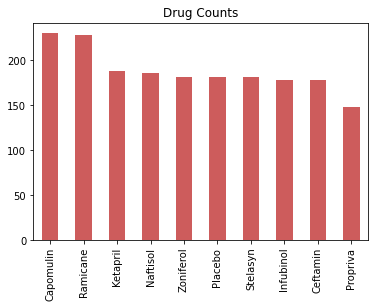

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barPandas = cleanData["Drug Regimen"].value_counts()
barPandas.plot(kind= "bar", color = "indianred" )

plt.title("Drug Counts")

Text(0.5, 1.0, "Number of each Drugs' usage")

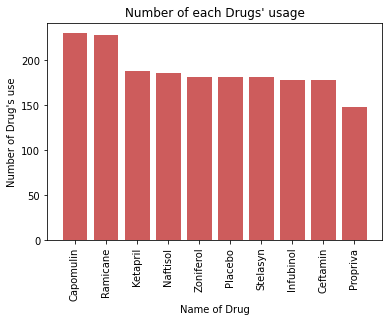

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_points = cleanData["Drug Regimen"].value_counts()

x_axis = np.arange(len(y_points))

plt.bar(x_axis, y_points, color = "indianred", align = "center")

tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, y_points.index.values)
#rotating ticks to be visible
plt.xticks(rotation = "vertical")

plt.xlabel("Name of Drug")
plt.ylabel("Number of Drug's use")
plt.title("Number of each Drugs' usage")

Text(0, 0.5, '')

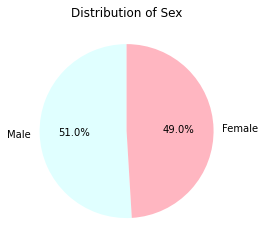

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderPd = cleanData["Sex"].value_counts()
colorsPd = ["lightcyan","lightpink"]

genderPd.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors= colorsPd)

plt.title("Distribution of Sex")

#get rid of the y label to male
plt.ylabel("")


Text(0.5, 1.0, 'Distribution of Sex')

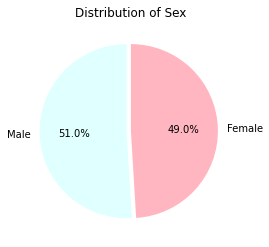

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colorsPy = ["lightcyan","lightpink"]
explode = (0.05,0.0)
plt.pie(genderPd, autopct="%1.1f%%", explode = explode, startangle = 90, labels = genderPd.index.values, colors=colorsPy)

plt.title("Distribution of Sex")


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
fourDrugs = pd.DataFrame(cleanData.groupby("Mouse ID")["Timepoint"].max().sort_values()).rename(columns={"Timepoint":"Timepoint Max"})

mergeDf = pd.merge(cleanData, fourDrugs, on = "Mouse ID")

mergeDf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [65]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugValue = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quarts = tumorValue.quantile([.25, .5, .75])
upperq = quarts[.25]
lowerq = quarts[.75]
iqr = upperq - lowerq

totalDrugVol = mergeDf[["Drug Regimen", "Tumor Volume (mm3)"]]

combinedDrugVol = totalDrugVol[totalDrugVol["Drug Regimen"].isin(drugs)]
combinedDrugVol

combinedDrugVolG = combinedDrugVol.groupby("Drug Regimen")
    
    # Determine outliers using upper and lower bounds
# outliers = (tumorValue.loc[(tumorVol["Tumor Volume (mm3)"] >= upperb) | (tumorVol["Tumor Volume (mm3)"] <= lowerb)]).count()

Text(0, 0.5, 'Tumor Volume')

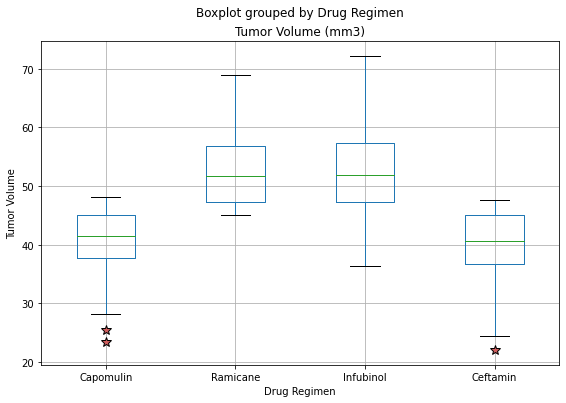

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker = "*", markerfacecolor = "indianred", markersize = 10)

combinedDrugVol.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", figsize = (9,6), flierprops= flierprops)

plt.title = ("Tumor Values Per Drug")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Tumor Volume")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

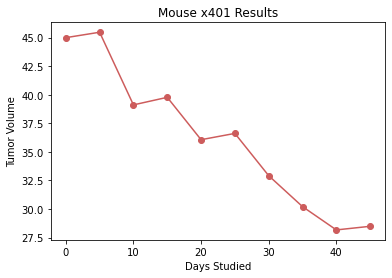

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
subjectMouse = cleanData.loc[cleanData["Mouse ID"] == "x401"]

plt.plot(subjectMouse["Timepoint"], subjectMouse["Tumor Volume (mm3)"], marker = "o", color ="indianred")

plt.title("Mouse x401 Results")
plt.xlabel("Days Studied")
plt.ylabel("Tumor Volume")



Text(0, 0.5, 'Weight of Mouse (g)')

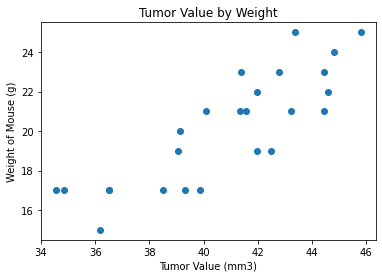

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capDrug = cleanData.loc[cleanData["Drug Regimen"] == "Capomulin"]


# Have to find average tumor volume now, reused code from before
tumorAvg = pd.DataFrame(capDrug.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume"})

#Have to merge both df to compare tumor vol vs weight
mergedDf = pd.merge(capDrug, tumorAvg, on="Mouse ID")
#Pull out the two columns (weight and tumor volume) then drop any repeats
finalCap = mergedDf[["Weight (g)", "Average Tumor Volume"]].drop_duplicates()
finalCap

x_value = finalCap["Average Tumor Volume"]
y_value = finalCap["Weight (g)"]

plt.scatter(x_value,y_value)


plt.title("Tumor Value by Weight")
plt.xlabel("Tumor Value (mm3)")
plt.ylabel("Weight of Mouse (g)")

## Correlation and Regression

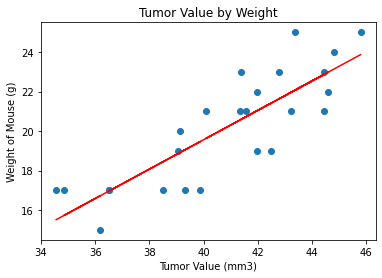

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capDrug = cleanData.loc[cleanData["Drug Regimen"] == "Capomulin"]
tumorAvg = pd.DataFrame(capDrug.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume"})

mergedDf = pd.merge(capDrug, tumorAvg, on="Mouse ID")
finalCap = mergedDf[["Weight (g)", "Average Tumor Volume"]].drop_duplicates()
finalCap

x_value = finalCap["Average Tumor Volume"]
y_value = finalCap["Weight (g)"]


plt.title("Tumor Value by Weight")
plt.xlabel("Tumor Value (mm3)")
plt.ylabel("Weight of Mouse (g)")

correlation = st.pearsonr(x_value, y_value)


#Find the regression
(cap_slope, cap_intercept, cap_rvalue, cap_pvlaue, cap_stderr) = stats.linregress(x_value, y_value)

cap_reg = cap_slope * x_value + cap_intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, cap_reg, "r-")

1. The first observation is that as the mouses weight increases we see an increase in tumor size.
2. When looking at mouse x401 we see a decrease of tumor size when treating with Capomulin, and this is futher shown when looking at mouse w914.
3. However it appears for mouses on Capomulin if there is an increase in weight the volume of their tumor would increase. 